# Tyler Grant

## Research question/interests
Can we use movements in the NASDAQ Composite Index (equity financial markets) to predict movements in Etherium cryptocurrency markets?e.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


nas = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")

nas.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,7906.439941,7940.370117,7847.319824,7874.160156,7874.160156,1936210000
1,2019-09-04,7949.810059,7981.410156,7928.939941,7976.879883,7976.879883,1891300000
2,2019-09-05,8061.290039,8134.419922,8061.290039,8116.830078,8116.830078,2096300000
3,2019-09-06,8125.580078,8134.390137,8098.520020,8103.069824,8103.069824,1876380000
4,2019-09-09,8130.910156,8131.660156,8052.339844,8087.439941,8087.439941,2172240000


(504, 6)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
         Date         Open         High          Low        Close      Volume
0  2019-09-03  7906.439941  7940.370117  7847.319824  7874.160156  1936210000
1  2019-09-04  7949.810059  7981.410156  7928.939941  7976.879883  1891300000
2  2019-09-05  8061.290039  8134.419922  8061.290039  8116.830078  2096300000
3  2019-09-06  8125.580078  8134.390137  8098.520020  8103.069824  1876380000
4  2019-09-09  8130.910156  8131.660156  8052.339844  8087.439941  2172240000
Date      504
Open      504
High      504
Low       504
Close     504
Volume    504
dtype: int64


<AxesSubplot:xlabel='Date', ylabel='Volume'>

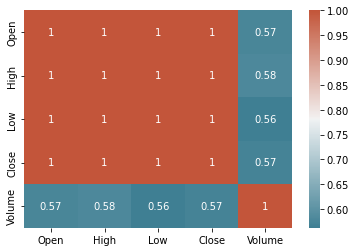

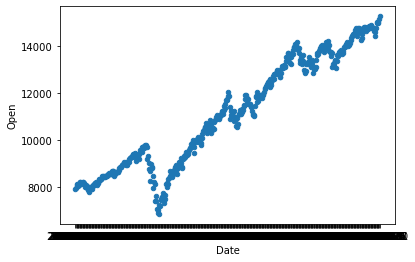

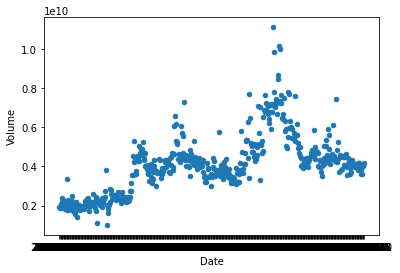

In [2]:
nas = nas.drop(columns=['Adj Close'])

print(nas.shape)

print(nas.columns)

print(nas.head())

print(nas.nunique(axis=0))
nas.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


hm = nas.corr()
sns.heatmap(hm, xticklabels=hm.columns, yticklabels=hm.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


nas.plot(kind='scatter', x='Date', y='Open')

nas.plot(kind='scatter', x='Date', y='Volume')


In [3]:
perChangePrice = []
perChangeVolume = [0]

for i in range(504):
    price = ((nas['Close'][i]-nas['Open'][i])/nas['Open'][i])*100
    perChangePrice.append(price)

    if i < 503:
        vol = ((nas['Volume'][i+1]-nas['Volume'][i])/nas['Volume'][i])*100
        perChangeVolume.append(vol)


nas['pp'] = perChangePrice
nas['vp'] = perChangeVolume
print(nas)




           Date          Open          High           Low         Close  \
0    2019-09-03   7906.439941   7940.370117   7847.319824   7874.160156   
1    2019-09-04   7949.810059   7981.410156   7928.939941   7976.879883   
2    2019-09-05   8061.290039   8134.419922   8061.290039   8116.830078   
3    2019-09-06   8125.580078   8134.390137   8098.520020   8103.069824   
4    2019-09-09   8130.910156   8131.660156   8052.339844   8087.439941   
..          ...           ...           ...           ...           ...   
499  2021-08-25  15039.030273  15059.429688  15011.580078  15041.860352   
500  2021-08-26  15025.169922  15059.629883  14939.559570  14945.809570   
501  2021-08-27  14969.769531  15144.480469  14966.519531  15129.500000   
502  2021-08-30  15165.940430  15288.080078  15165.120117  15265.889648   
503  2021-08-31  15262.879883  15278.959961  15202.669922  15259.240234   

         Volume        pp         vp  
0    1936210000 -0.408272   0.000000  
1    1891300000  0.34

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

eth = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")

eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5.554800e+09
1,2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6.503447e+09
2,2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6.962729e+09
3,2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5.938120e+09
4,2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5.589477e+09


(732, 6)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
         Date        Open        High         Low       Close        Volume
0  2019-09-01  172.458405  173.696854  169.531281  171.629425  5.554800e+09
1  2019-09-02  171.697601  180.145218  170.451691  178.347351  6.503447e+09
2  2019-09-03  178.357758  182.347992  175.970169  179.499329  6.962729e+09
3  2019-09-04  179.491989  180.136597  175.325363  175.992889  5.938120e+09
4  2019-09-05  175.966278  176.163910  171.746826  174.217133  5.589477e+09
Date      732
Open      728
High      728
Low       728
Close     728
Volume    728
dtype: int64


<AxesSubplot:xlabel='Date', ylabel='Volume'>

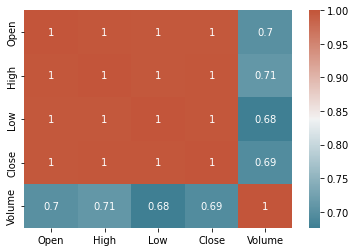

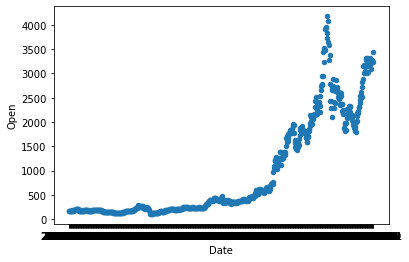

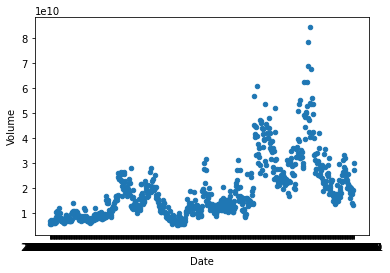

In [5]:
eth = eth.drop(columns=['Adj Close'])

print(eth.shape)

print(eth.columns)

print(eth.head())

print(eth.nunique(axis=0))
eth.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


hm = eth.corr()
sns.heatmap(hm, xticklabels=hm.columns, yticklabels=hm.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


eth.plot(kind='scatter', x='Date', y='Open')

eth.plot(kind='scatter', x='Date', y='Volume')

In [6]:
perChangePrice = []
perChangeVolume = [0]

for i in range(732):
    price = ((eth['Close'][i]-eth['Open'][i])/eth['Open'][i])*100
    perChangePrice.append(price)

    if i < 731:
        vol = ((eth['Volume'][i+1]-eth['Volume'][i])/eth['Volume'][i])*100
        perChangeVolume.append(vol)


eth['pp'] = perChangePrice
eth['vp'] = perChangeVolume

print(eth)


           Date         Open         High          Low        Close  \
0    2019-09-01   172.458405   173.696854   169.531281   171.629425   
1    2019-09-02   171.697601   180.145218   170.451691   178.347351   
2    2019-09-03   178.357758   182.347992   175.970169   179.499329   
3    2019-09-04   179.491989   180.136597   175.325363   175.992889   
4    2019-09-05   175.966278   176.163910   171.746826   174.217133   
..          ...          ...          ...          ...          ...   
727  2021-08-28  3275.104492  3284.845947  3217.403564  3244.403320   
728  2021-08-29  3246.770996  3283.235596  3158.840332  3227.002686   
729  2021-08-30  3227.192627  3346.581055  3151.444580  3224.374268   
730  2021-08-31  3227.758057  3466.992188  3195.216553  3433.732666   
731  2021-09-01  3430.762451  3836.867432  3387.408447  3834.828125   

           Volume         pp         vp  
0    5.554800e+09  -0.480684   0.000000  
1    6.503447e+09   3.872943  17.077980  
2    6.962729e+09   0

         Date  eth_percent_change_in_price  eth_percent_change_in_volume  \
0  2019-09-03                     0.640046                      7.062129   
1  2019-09-04                    -1.949446                    -14.715616   
2  2019-09-05                    -0.994023                     -5.871285   
3  2019-09-06                    -2.420621                     21.614464   
4  2019-09-09                    -0.117460                     11.745707   

   nas_percent_change_in_price  nas_percent_change_in_volume  
0                    -0.408272                      0.000000  
1                     0.340509                     -2.319480  
2                     0.688972                     10.839105  
3                    -0.277030                    -10.490865  
4                    -0.534629                     15.767595  


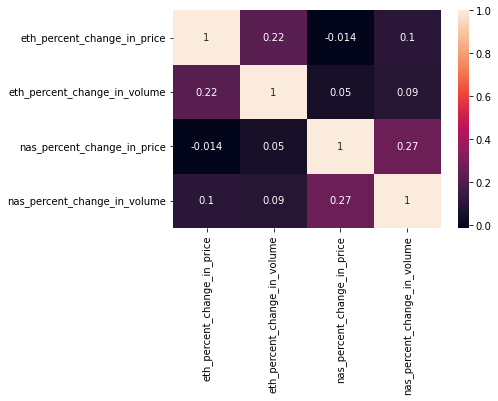

In [78]:
result = eth.merge(nas, on=['Date'])

result = result.drop(['Open_x','High_x','Low_x','Close_x','Volume_x','Open_y','High_y','Low_y','Close_y','Volume_y'],axis=1)

result = result.rename(columns={"pp_x": "eth_percent_change_in_price","pp_y": "nas_percent_change_in_price","vp_x": "eth_percent_change_in_volume","vp_y": "nas_percent_change_in_volume"})
print(result.head())

columns = result[['eth_percent_change_in_price', 'eth_percent_change_in_volume', 'nas_percent_change_in_price', 'nas_percent_change_in_volume']]

data = log_returns = np.log(columns/columns.shift())

sns.heatmap(data.corr(), annot=True);
